# **DSL 24-1 기초 과제 1**

### 기수 : 12
### 이름 : 백민경


In [11]:
# 코랩에서 작성할 경우 아래 주석을 해제해주세요
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


필수 라이버러리 갖고오기

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import timeit
from scipy import stats

## **2-3**

해당 문제에서는 예시 사진을 이용해서 SVD-Decomposition 이 어떻게 사진을 압축하는데에 사용이 되는지 보여주고 있습니다. 본인이 선정한 사진에 SVD-Decomposition 을 활용해서 Sigma 차원을 $100$ 으로 설정할 경우 용량이 실제로 줄어드는지 확인해보겠습니다.

경로 설정 (image.jpg 경로로 바꿔주세요!)

In [13]:
path_to_image = "/content/image.jpg"

이미지 출력해서 확인해보기 (**편의상 흑백을 사용할 예정입니다**)

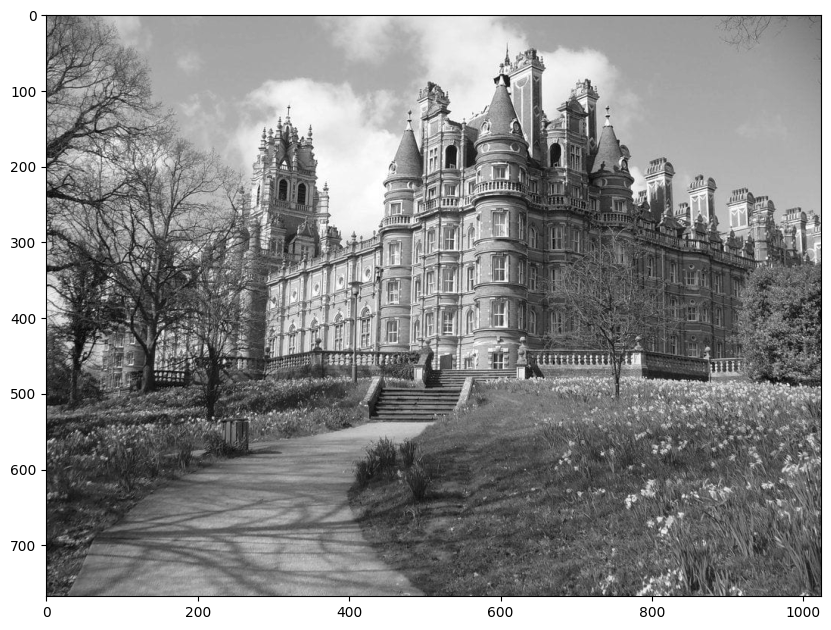

In [14]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

다음과 같이 이미지를 Float32 형태의 데이터로 바꾸겠습니다.

In [15]:
image_float = image.astype(np.float32)

그 뒤에 np.linalg.svd 를 활용해서 SVD-Decomposition 을 진행하겠습니다. 여기에서 np.linalg.svd 의 아웃풋은 $U$, 시그마 값, $V^\top$ 가 나오게 되며, 시그마 값을 이용해서 대각선에는 시그마 값들이 있으며 나머지는 $0$ 인 메트릭스를 만들겠습니다.

In [16]:
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)

# 시그마 행렬 확인 용도
print(Sigma_mat.shape)

(768, 1024)


 여기서부터는 해당 이미지에 관해서 고유벡터 $70$ 개만 쓰겠습니다. 즉(나머지 원소들은 $0$ )

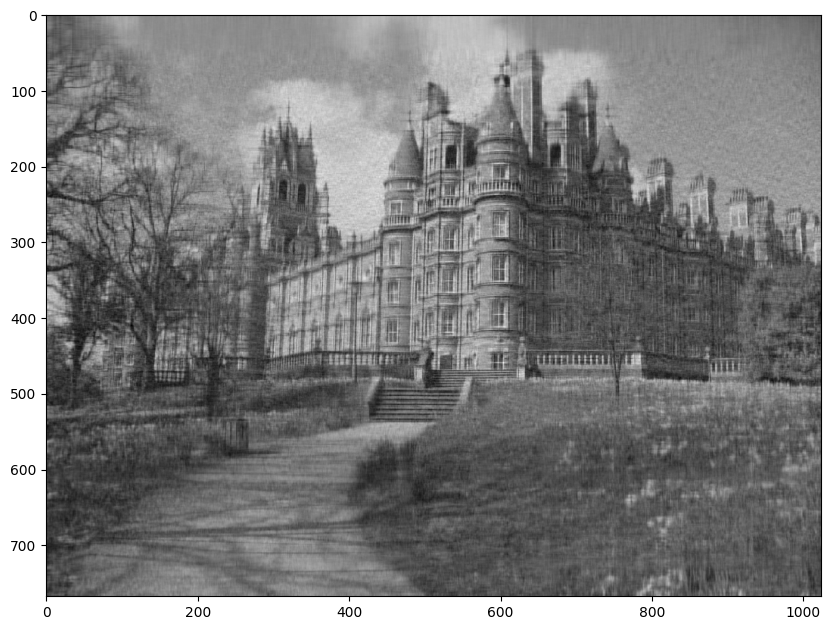

In [17]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

전에 비해서 확실히 흐릿해진 모습을 보이고 있습니다. 그렇다면 해당 사진과 이전 사진과 비교해서 어떤 것이 더 많은 용량 (즉 더 많은 Non-Zero 값)을 사용하고 있는지 알아보겠습니다.

In [18]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  1639168  Non-zero Elements
Image Composition uses  125510  Non-zero Elements
Processing Time for 10 Full Images: 5.58463 seconds
Processing Time for 10 Compressed Images: 0.31762 seconds


원본과 확연히 큰 차이를 보이고 있습니다. 그럼에도 원래 이미지가 무엇을 표현하고 싶은지에 대한 정보를 여전히 포함하고 있습니다.
=> SVD-Decomposition 을 활용하면 더 적은 용량으로 원본의 정보를 살릴 수 있다!

## **문제 2-3**

아래에는 Skeleton Code 가 있습니다. 빈칸에 자기가 원하는 사진과 차원 수를 조정하면서 원본에 비해서 적은 용량을 차지하면서도 원본에 대한 정보를 유지해주세요.

In [23]:
path_to_image = "/content/new.jpg"

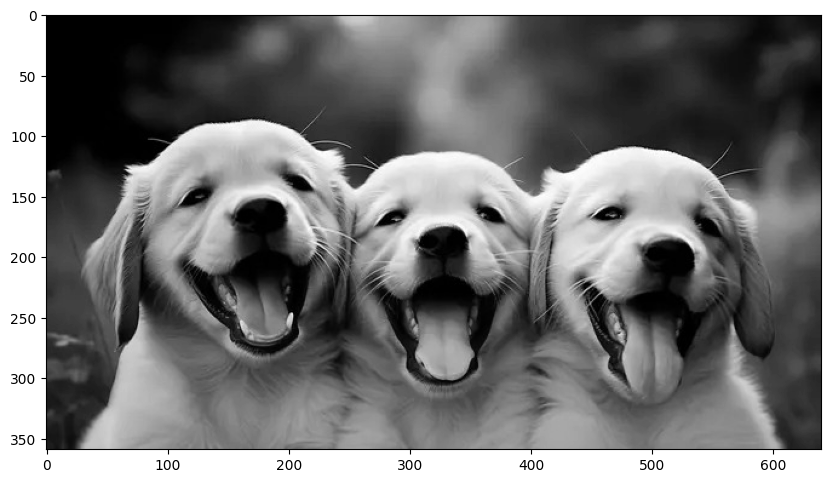

In [24]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

In [25]:
image_float = image.astype(np.float32)
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)
print("Image Float's Shape : ", image_float.shape)

Image Float's Shape :  (359, 640)


시그마 메트릭스 $(\Sigma)$ 차원 설정

In [31]:
num_elements = 50

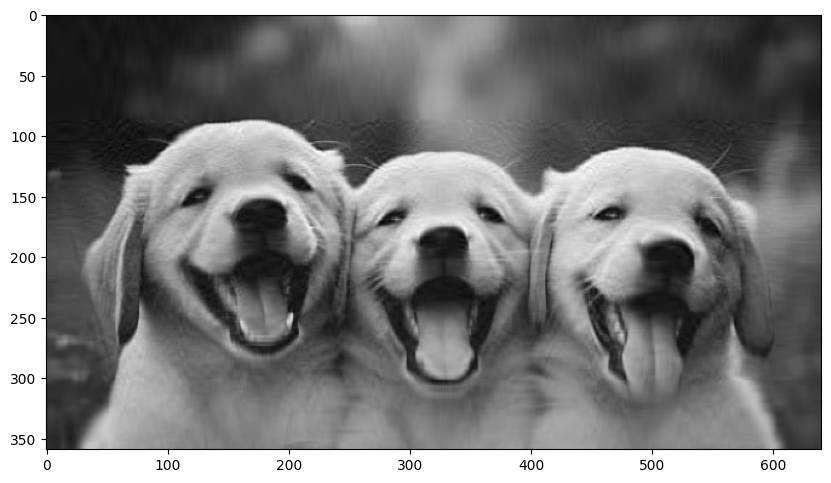

In [32]:
image_composition = np.matmul(U[:, :num_elements], np.matmul(Sigma_mat[:num_elements, :num_elements], Vt[:num_elements, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

In [33]:
full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  538840  Non-zero Elements
Image Composition uses  70000  Non-zero Elements
Processing Time for 10 Full Images: 1.74868 seconds
Processing Time for 10 Compressed Images: 0.17963 seconds


## **문제 4-2**

파이썬의 scipy.stats 을 활용해서 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.

heights.csv 경로 설정하기

In [41]:
import pandas as pd
import scipy.stats as stats

In [42]:
path_to_csv = "/content/heights.csv"

전처리

In [49]:
#data = pd.read_csv(path_to_csv)
#DSL = data[data['which'] == 'DSL']
#ESC = data[data['which'] == 'ESC']
#Else = data[data['which'] == 'Else']

# 'heights' 열을 숫자로 변환
data['heights'] = pd.to_numeric(data['heights'], errors='coerce')

# 그룹별 데이터 분리
DSL = data[data['which'] == 'DSL']['heights'].dropna()
ESC = data[data['which'] == 'ESC']['heights'].dropna()
Else = data[data['which'] == 'Else']['heights'].dropna()

DSL 데이터 형태

In [50]:
DSL.head()

0    181.8
1    161.3
2    177.8
3    169.1
4    181.2
Name: heights, dtype: float64

ESC 데이터 형태

In [51]:
ESC.head()

78    171.1
79    159.2
80    184.9
81    176.1
82    184.8
Name: heights, dtype: float64

Else 데이터 형태

In [52]:
  Else.head()

141    180.6
142    169.3
143    176.0
144    180.3
145    177.7
Name: heights, dtype: float64

In [53]:
# ANOVA 검정 수행
f_statistic, p_value = stats.f_oneway(DSL, ESC, Else)

# 결과 출력
print(f"F-통계량: {f_statistic}")
print(f"p-값: {p_value}")

# 결론 도출
if p_value < 0.05:
    print("유의수준 5%에서 귀무가설을 기각합니다. 즉, 적어도 하나의 학회의 평균 키가 통계적으로 유의미하게 다릅니다.")
else:
    print("유의수준 5%에서 귀무가설을 기각할 수 없습니다. 즉, 모든 학회의 평균 키가 동일하다고 할 수 있습니다.")

F-통계량: 6.82185346949053
p-값: 0.0013059664602332191
유의수준 5%에서 귀무가설을 기각합니다. 즉, 적어도 하나의 학회의 평균 키가 통계적으로 유의미하게 다릅니다.


## **문제 6**

파이썬의 pandas와 numpy 활용과 관련한 몇몇 예제입니다. 주어진 실행 결과와 요구하는 바에 맞게 코드를 작성하시오.

#### 6-A. Pandas

In [54]:
import pandas as pd

path_to_csv = "/content/train.csv"
data = pd.read_csv(path_to_csv)

In [ ]:
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

6-1. 사용자의 Name은 여러 ,로 나누어져 있습니다. 첫번째 , 이전의 텍스트를 새로운 filteredName이라는 새로운 변수로 dataframe에 추가해주세요.

In [55]:
# TO-DO

# 1. Name 변수에 대한 전처리
# 2. 전처리 한 변수를 다시 dataframe에 추가


# Name 변수에 대해 전처리하여 filteredName 추가
data['filteredName'] = data['Name'].apply(lambda x: x.split(',')[1].strip())

# 결과 확인
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  \
0      0         A/5 21171   7.2500   NaN        S   
1      0          PC 17599  71.2833   C85        C   
2      0  STON/O2. 3101282   7.9250   NaN        S   
3      0            113803  53.1000  C123        S   
4      0            373450   8.0500   NaN        S   

                                 filteredName  
0                             Mr. Owen Harris  
1  Mrs. John Bradley (Florence Briggs Thayer)  
2                                 Miss. Laina  
3          Mrs. Jacques Heath (Lily May Peel)  
4                           Mr. William Henry

6-2. 사용자를 PassengerId가 아닌 Age를 기준으로 정렬하여주세요.

In [56]:
# TO-DO

# 정렬

# Age를 기준으로 정렬
sorted_data = data.sort_values(by='Age')

# 결과 확인
sorted_data.head()

PassengerId  Survived  Pclass                             Name     Sex  \
803          804         1       3  Thomas, Master. Assad Alexander    male   
755          756         1       2        Hamalainen, Master. Viljo    male   
644          645         1       3           Baclini, Miss. Eugenie  female   
469          470         1       3    Baclini, Miss. Helene Barbara  female   
78            79         1       2    Caldwell, Master. Alden Gates    male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked  \
803  0.42      0      1    2625   8.5167   NaN        C   
755  0.67      1      1  250649  14.5000   NaN        S   
644  0.75      2      1    2666  19.2583   NaN        C   
469  0.75      2      1    2666  19.2583   NaN        C   
78   0.83      0      2  248738  29.0000   NaN        S   

                filteredName  
803  Master. Assad Alexander  
755            Master. Viljo  
644            Miss. Eugenie  
469     Miss. Helene Barbara  
78       Master. Alden Gates

6-3. 위의 head로 살폈을 때, Cabin 변수에는 결측치 (NaN) 값이 많은 것으로 보여집니다. Cabin 변수의 데이터 종류 (NaN-?개, C95-?개 등)을 확인하여 히스토그램으로 시각화해주세요.

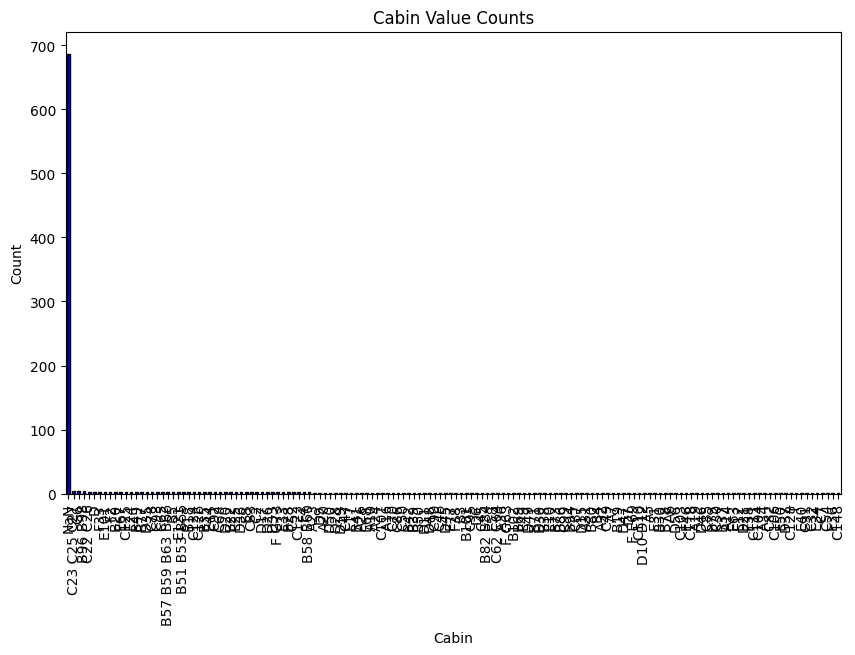

Cabin 변수 종류:
 Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64
NaN 값의 개수: 687


In [62]:
# TO-DO

# 1. Cabin 변수의 값 종류 확인
# 2. 히스토그램 시각화

# Cabin 변수의 값 종류 확인
cabin_values = data['Cabin'].value_counts(dropna=False)

# NaN 값의 개수 확인
nan_count = data['Cabin'].isna().sum()
cabin_value_counts = data['Cabin'].fillna('NaN').value_counts()

# Cabin 변수 히스토그램 시각화
plt.figure(figsize=(10, 6))
cabin_value_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Cabin Value Counts')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.show()

print(f'Cabin 변수 종류:\n {cabin_values}' )
print(f'NaN 값의 개수: {nan_count}')

6-4. (Optional)

Sibsp는 # of siblings / spouses aboard the Titanic, Parch는 # of parents / children abroad the Titanic 입니다. Sibsp 변수와 Parch 중 Survived 변수 중 Survived 여부에 영향을 끼치는 하나의 변수를 선택한다면 무엇을 선택할 것이며, 그 이유가 무엇인가요?

#### 6-B. Numpy

6-5. 아래 lst와 같이 주어진 행렬이 있습니다. 해당 3x3 행렬을 4x2x2 tensor로 변환해주세요. 각각의 2x2 행렬은 좌측 상단 / 좌측 하단 / 우측 상단 / 우측 하단을 뜻합니다.

In [58]:
import numpy as np

lst = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

arr = np.array(lst)

# TO-DO

# 4x2x2 텐서로 변환
tensor = np.array([
    arr[:2, :2],  # 좌측 상단
    arr[1:, :2],  # 좌측 하단
    arr[:2, 1:],  # 우측 상단
    arr[1:, 1:]   # 우측 하단
])

# 결과 출력
print(tensor)


[[[1 2]
  [4 5]]

 [[4 5]
  [7 8]]

 [[2 3]
  [5 6]]

 [[5 6]
  [8 9]]]


6-6. Unifrom Distribution으로부터 Sampling한 100개의 점과 Gaussian Distribution으로부터 Sampling한 100개의 점의 분포를 시각화해주세요. 시각화 시 plot에 각 분포의 평균/중앙값을 점선으로 함께 시각화해주세요.

1. uniform distribution은 (0, 1) 범위로, gaussian은 mean이 0, std가 1입니다.
2. 해당 문제에서 사용할 수 있는 라이브러리는 Numpy와 Matplotlib로 제한합니다.

![image.png](attachment:image.png)

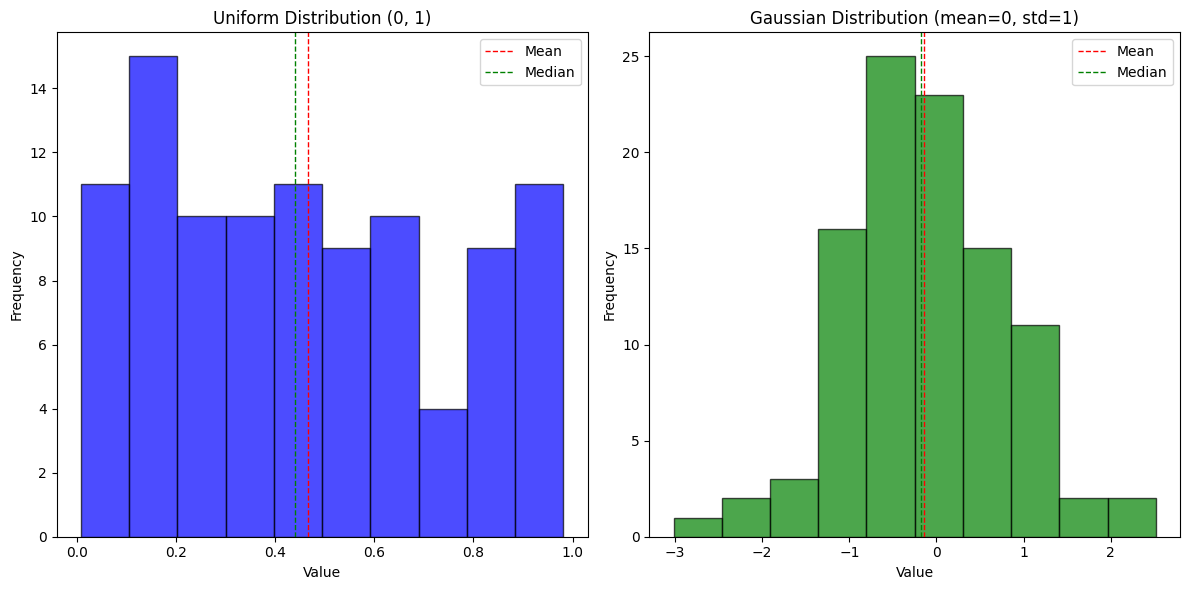

In [59]:
# TO-DO

# 1. Uniform Distribution으로부터 100개의 점 Sampling
# 2. Gaussian Distribution으로부터 100개의 점 Sampling
# 3. 시각화
# 4. 평균/중앙값 점선으로 시각화

import numpy as np
import matplotlib.pyplot as plt

# 1. Uniform Distribution에서 100개의 점 샘플링
uniform_samples = np.random.uniform(0, 1, 100)

# 2. Gaussian Distribution에서 100개의 점 샘플링 (mean=0, std=1)
gaussian_samples = np.random.normal(0, 1, 100)

# 3. 시각화
plt.figure(figsize=(12, 6))

# Uniform Distribution 시각화
plt.subplot(1, 2, 1)
plt.hist(uniform_samples, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(np.mean(uniform_samples), color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(np.median(uniform_samples), color='g', linestyle='dashed', linewidth=1, label='Median')
plt.title('Uniform Distribution (0, 1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Gaussian Distribution 시각화
plt.subplot(1, 2, 2)
plt.hist(gaussian_samples, bins=10, alpha=0.7, color='green', edgecolor='black')
plt.axvline(np.mean(gaussian_samples), color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(np.median(gaussian_samples), color='g', linestyle='dashed', linewidth=1, label='Median')
plt.title('Gaussian Distribution (mean=0, std=1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
